# Introduction to Machine Learning

Let's start by saying that automatic learning *(Machine Learning in English)*, is a branch of computational science that uses algorithms to give machines *(meaning computers)* the ability to learn through data, without that are explicitly programmed for it *(Let's clarify that this is one of many definitions that can be found on the [web](https://www.google.com/search?q=machine+learning&source=hp&ei=TyeOY7C0CI-bwbkP2OKf6A0&iflsig=AJiK0e8AAAAAY441X5T7-ip8CpKkKrf23oSJoJrX6jvn&ved=0ahUKEwjwl726_eL7AhWPTTABHVjxB90Q4dUDCAg&uact=5&oq=machine+learning&gs_lcp=Cgdnd3Mtd2l6EAMyBQgAEIAEMgUIABCABDIFCAAQgAQyBQguEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEOg4ILhCABBDHARDRAxDUAjoLCC4QgAQQxwEQ0QM6CAguEIAEENQCOgsILhCvARDHARCABDoHCAAQgAQQCjoICC4Q1AIQgAQ6BwguEIAEEApQnARYhRBguBFoAXAAeACAAcoBiAHuDpIBBjAuMTMuMZgBAKABAbABAA&sclient=gws-wiz))*

In a nutshell, in this notebook, we're going to take a bunch *(by bunch means a set)* of data, and then we'll employ some learning algorithms, maybe one in particular *(Some of these algorithms are inspired by models probabilistic and statistical learning)*, and to this we will apply some prediction or classification exercise, in short, this is what we will call *Machine Learning*.

## Basic concepts

Next, it is important that we familiarize ourselves with some terms before proceeding with the theory. Nothing formal theoretical, it's just an approximation.

### Supervised Learning and Unsupervised Learning

In a **Supervised** machine learning model we basically take care of defining its inputs and outputs. A classic case is where we want to classify a given image, for example, we have a set of images of different types of cute kittens, we digitize them and convert them into vectors, and we teach the model that each of these vectors represents a type of cat. and then we'll try to input an image with a cat of one of these classes and see that our model might be able to tell us if it's an Egyptian Mau cat or a Chartreux.

On the other hand, we have the **Unsupervised** model, we do not know the outputs, but we are clear about the input *(And with this we mean the input data set)*, which means that the algorithm must be able to establish relationships and/or patterns by us. In other words, the algorithm is capable of finding criteria to group similar entries using only the information received.

### Classification or Regression?

We can say that in general the problems that we will mainly deal with could be divided into two types:

* **Classification**: Let's think for a second, that we can tell our model that the output is of the discrete type, that is $x \in A$, where $A$ is a finite set *(Let's say the set of cats of the introduction)*. In this type of problem, we usually define the inputs and outputs, that is, we will end up with a supervised learning model.

* **Regression**: for this case, we will talk about the opposite case of classification, that is, our output is a continuous variable, perhaps of the type $x \in \mathbf{R}$, defined over some interval. Let's talk, for example, about the temperature for tomorrow, that is to say that here most of the problems are due to numerical predictions.

## Our first machine learning model

The idea now is to go step by step developing a very simple machine learning model. During this process we will make use of the `Pandas` and `Numpy` libraries and we will introduce a new one called `sklearn`.

Let's start by downloading the data we are going to work with. For the development of our model we are going to use the classic [iris dataset](https://archive-beta.ics.uci.edu/dataset/53/iris):

In [1]:
# Import Pandas and give it the alias pd
import pandas as pd

# Import the data from the dataset and convert it to a DataFrame.
df_iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now let's see what we have in the data set:

In [2]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We have 150 observations in total (`count`), the set has four features (columns: `sepal_length`, `sepal_width`, `petal_length` and `petal width`) and an iris class classification (column `class`), Furthermore, since the characteristics of the set are numerical, we can see some relevant statistics such as the mean, standard deviation and some percentile data. Beyond that we see that our set is very well organized and at first glance does not seem to have any value that is going to be a problem. Can we know how many kinds of iris were observed? Of course!

In [3]:
df_iris['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

As we can see, the `value_counts()` method tells us that there are 3 different classes of iris, each with respectively 50 observations (this is known as a *balanced* data set). Let's see it graphically:

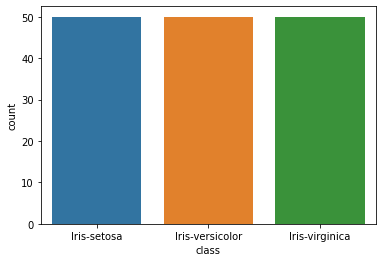

In [4]:
# Import the Seaborn library and assign it the alias sns
import seaborn as sns

# The class column of the DataFrame is displayed
sns.countplot(x=df_iris['class'])

We're in luck, our data is already balanced, and to a large extent this is important in a *classification* problem, but in real life it's more realistic to deal with unbalanced data sets.

> If the data is not balanced it will lead us to unbalanced models that would have very low performance or predictive power.

## Correlations and more

Next, we'll use the power of visualization to find out if we have any patterns, or correlations, in some of the iris features over the data set:

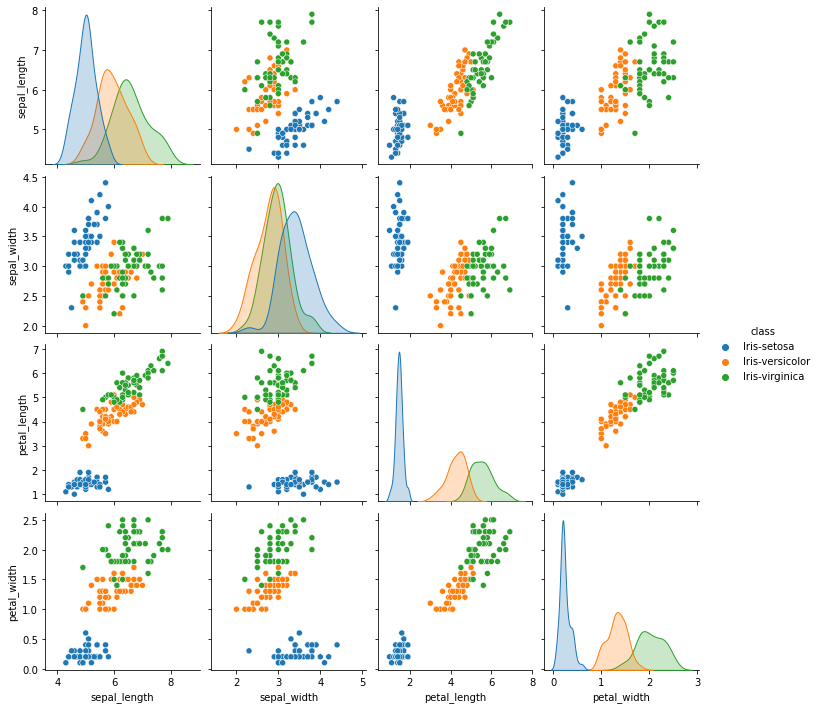

In [5]:
# Seaborn is imported, and the data is visualized in a pairplot.
import seaborn as sns
sns.pairplot(df_iris, hue="class")

Analyzing the graphs a bit, we can see that most of the characteristics *(Petal width and length, sepal length and width) * follow a **normal distribution**, which means that most of the observations are located at the center of the data, through this reading we could think about what would be the best algorithm for this problem.

We can also see that some Iris classes, and in certain features the data does not overlap, which tells us that it is okay for us to use as many columns as possible to try to avoid some phony data.

And now the next step is about the correlations that may exist between the characteristics and for this we will use the **heat map**, *by its name in English Heat Map*:

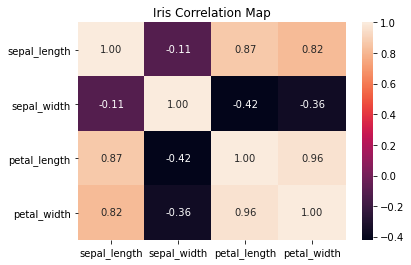

In [6]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots()

sns.heatmap(df_iris.corr(), annot=True, fmt=".2f", ax=axis)

plt.title('Iris Correlation Map')

plt.show()

If some of the columns present a high correlation between them, where these columns represent the independent characteristics *(length and width of the petal or the length and width of the sepal)*, this is known by its name of **Multiple Correlation* *, and from an inferential statistical point of view this could lead to unreliable results.

**The solution to this can be as simple as removing the columns**, try to remove the columns whose correlation equals $0.9$, luckily it's not something that happens in our data set (We'll skip this in this exercise, let's keep going!).

## Model training

Let's say the data is ready, the first thing we need to do is identify who is the set $X$ *(properties)* and who is the set $y$ *(category)*:

In [7]:
# The class column is excluded, since it is more of a category
X = df_iris.drop(columns=['class'])

# Take only the possible categories of iris
y = df_iris["class"].values

> In some cases, the magnitudes of the characteristics vary in units of measurement or scale (for example, a characteristic may be measured in millions -population of people-, and another in small units -weight-), that is, they are slightly different , this can affect the prediction and in these cases it is better to normalize the data *(sometimes referred to as scaling)*. This step will not be done on the set we are working on.

### Training and test data

The next step is to split the data into two sets, the test set and the training set:

> One of the most important objectives when creating a machine learning model is that it be balanced. Let's take into account that balanced also refers to the fact that the model works optimally in relation to our variables of interest.

To split the data into the two sets we use the `train_test_split` method of the `sklearn` library. Notice that we start with two sets ($X$ and $y$) and come out with four ($X_{train}, X_{test}, y_{train}, y_{test}$)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, shuffle=True)
X_test

,sepal_length,sepal_width,petal_length,petal_width
38,4.4,3.0,1.3,0.2
66,5.6,3.0,4.5,1.5
115,6.4,3.2,5.3,2.3
117,7.7,3.8,6.7,2.2
89,5.5,2.5,4.0,1.3
136,6.3,3.4,5.6,2.4
68,6.2,2.2,4.5,1.5
94,5.6,2.7,4.2,1.3
84,5.4,3.0,4.5,1.5
28,5.2,3.4,1.4,0.2


Some characteristics can be changed in the division of the data, for example, what amount we want for the training set and for the test set, in the case above, we chose 25% of the data for the test set `test_size=0.25 `

## Random Forest Classifier

It's time to train the model known as **Random Forest Classifier**, let's remember that this is a supervised algorithm that is based on Bayes' theorem. We are not going to talk much about the algorithm since it is not the purpose of the notebook, but you can find many sources of information to delve into it.

Let's start with the implementation:

In [10]:
# Import the RandomForestClassifier libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create test and training suites
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=100)

# The Random Forest classification model is instantiated, the Random Forest algorithm uses
# decision trees, in this case we are going to use 100 of these.
forest = RandomForestClassifier(n_estimators=100, random_state=100)

Now, the next step is to fit the model and generate predictions:

In [11]:
# Fits the model
forest.fit(X_train, y_train)

# The predictions are generated with the test set
predictions = forest.predict(X_test)

# Check the accuracy of the generated model
accuracy_score(y_test, predictions)

0.9111111111111111

And that's basically all. Step by step what we did was: a) train/fit a model with the training set, b) predict the classes of the test set data, c) compare the predictions with reality and measure it with the metric called `accuracy `.

Our generated model is **91%** accurate, which isn't bad at all, in fact for our first time it sounds pretty promising.
One way to understand the metric is that: out of 100 Iris flower data where all four characteristics are known, approximately 91 will be correctly classified.

### Other evaluation metrics
We can evaluate the previously generated model, with the review of other indicators such as **precision**, **recall** and **F1 score**, generated by means of the `classification_report()` method. :

In [12]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.79      0.88        19
 Iris-virginica       0.73      1.00      0.85        11

       accuracy                           0.91        45
      macro avg       0.91      0.93      0.91        45
   weighted avg       0.93      0.91      0.91        45



## Final considerations
What we have seen so far is the first step, very introductory, of training classification models, there are many details that we have not yet covered and others that we will not cover. Each model is different and what we do to train one may not work in another situation, for example, there are many evaluation metrics and depending on the characteristics of the set, the type of model (binary, non-binary classification, regression, among others) one must work with one or the other metric.

In the practical section, a binary classification model with other evaluation metrics and other tools to improve the model will be addressed.

# References
1. Burkov, A. (2019). The Hundred-Page Machine Learning Book. Andriy Burkov
2. Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 785–794). New York, NY, USA: ACM. https://doi.org/10.1145/2939672.2939785
3Theobald, O. (2019). Machine Learning for Absolute Beginners: A Plain English Introduction (3rd ed.). Scatterplot Press
4. Hunter, J. D. (n.d.). Matplotlib: A 2D graphics environment. Recuperado de https://matplotlib.org/
5Pedregosa, F., Varoquaux, Ga"el, Gramfort, A., Michel, V., Thirion, B., Grisel, O., … others. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825–2830.